## Import S&P Data as dataframe

In [143]:
#Import the csv into a panda dataframe
#conda install matplotlib
#"https://finance.yahoo.com/quote/%5EGSPC/history?period1=-1325635200&period2=1584144000&interval=1d&filter=history&frequency=1d")
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
spdata = pd.read_csv('SP.csv') 

#Check Date value type
type(spdata.Date.iloc[0])

#Change string date to date
spdata["Date"] = pd.to_datetime(spdata["Date"]).dt.strftime('%Y-%m-%d')

#Check that it is date format now
type(spdata.Date.iloc[0])

# #Combine the two datasets
rcdata = pd.read_csv('recession.csv') 
rcdata.columns=['Date','recession']

#Check Date value type
type(rcdata.Date.iloc[0])

#Change string date to date
rcdata["Date"] = pd.to_datetime(rcdata["Date"]).dt.strftime('%Y-%m-%d')
df = pd.merge(spdata, rcdata, on='Date', how='left')

print(df)

             Date         Open         High          Low        Close  \
0      1927-12-30    17.660000    17.660000    17.660000    17.660000   
1      1928-01-03    17.760000    17.760000    17.760000    17.760000   
2      1928-01-04    17.719999    17.719999    17.719999    17.719999   
3      1928-01-05    17.549999    17.549999    17.549999    17.549999   
4      1928-01-06    17.660000    17.660000    17.660000    17.660000   
...           ...          ...          ...          ...          ...   
23153  2020-03-06  2954.199951  2985.929932  2901.540039  2972.370117   
23154  2020-03-09  2863.889893  2863.889893  2734.429932  2746.560059   
23155  2020-03-10  2813.479980  2882.590088  2734.000000  2882.229980   
23156  2020-03-11  2825.600098  2825.600098  2707.219971  2741.379883   
23157  2020-03-12  2630.860107  2660.949951  2478.860107  2480.639893   

         Adj Close      Volume  recession  
0        17.660000           0        NaN  
1        17.760000           0     

## Analyze S&P Data

In [144]:
#Replace the null recession data with 0 since there was no recession then
df.recession = df.recession.replace(np.nan, 0)
df.isnull().sum().to_frame()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
recession,0


## Add new columns to S&P Data

In [145]:
#Change the Date column to date format
df['Date'] =  pd.to_datetime(df['Date'])

#Add a month column based on the date column (%b=first three letters, %B=full month name)
df['month'] = df['Date'].dt.to_period('M')

#Create a column for the day of the week
df['day'] = df['Date'].dt.day_name()

#Using lambda
df['volume'] = df['Volume'].apply(lambda x: 'Yes' if x >0 else 'No')

#Check the first five rows since there is no volume
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,recession,month,day,volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0,0.0,1927-12,Friday,No
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,0.0,1928-01,Tuesday,No
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,0.0,1928-01,Wednesday,No
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,0.0,1928-01,Thursday,No
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,0.0,1928-01,Friday,No


In [146]:
#Reduce the data size of Volume by 1M for graphs
df['volume_m'] = df['Volume']/1000000
#Add d month-year column based on the date column 
df['month'] = df['Date'].dt.to_period('M')
#Determine the max close price in a given month
df['month_max_close'] = df.groupby('month')['Close'].transform(max)
#Determine the min close price in a given month
df['month_min_close'] = df.groupby('month')['Close'].transform(min)
#Determine the median total volume in a given month
df['month_mean_volume'] = df.groupby('month')['Volume'].transform(np.median)
#Determine the difference between open and close to see the change from the previous day
df['open_close'] = df['Open'] - df['Close']
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,recession,month,day,volume,volume_m,month_max_close,month_min_close,month_mean_volume,open_close
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0,0.0,1927-12,Friday,No,0.0,17.66,17.66,0,0.0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,0.0,1928-01,Tuesday,No,0.0,17.76,17.26,0,0.0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,0.0,1928-01,Wednesday,No,0.0,17.76,17.26,0,0.0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,0.0,1928-01,Thursday,No,0.0,17.76,17.26,0,0.0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,0.0,1928-01,Friday,No,0.0,17.76,17.26,0,0.0


### Create a graph that shows the effect of the Recession on the S&P close price. (matplotlib)
#### Based on the graph below, once can determine that each recession occurs about every 10 years, some lasting longer than others. When there is a recession, it impacts the index which causes a dip

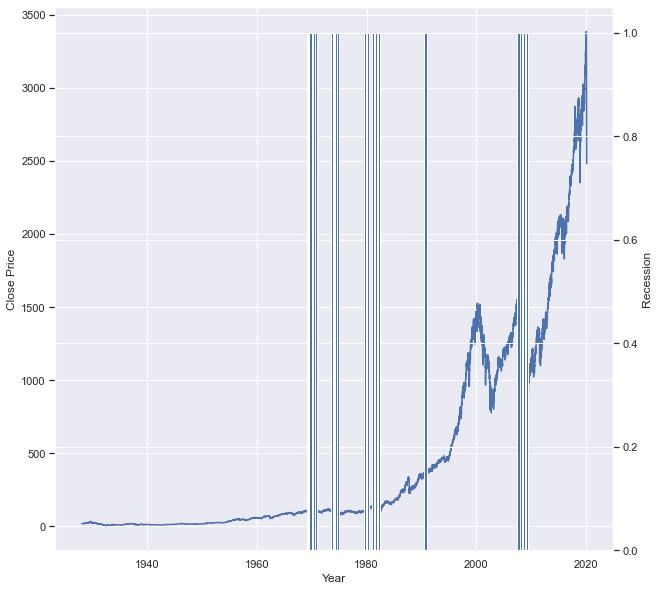

In [158]:
fig, ax1 = plt.subplots(figsize=(10,10))
ax2 = ax1.twinx()
ax1.plot(df.Date, df.Close, 'b')
ax2.bar(df.Date, df.recession, width=150)
ax1.set_xlabel('Year')
ax1.set_ylabel('Close Price')
ax2.set_ylabel('Recession')
plt.show()

### Find out if volume differs by day (matplotlib)
#### As per the graph below, it appears that on average, Monday is when there is more likely an increase in Close price and Wednesdays seems to show the biggest decrease (more sell offs likely).

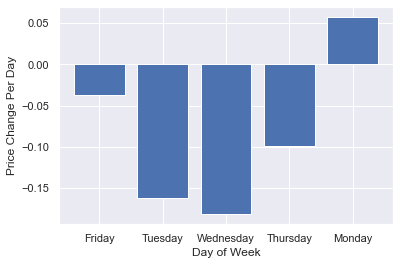

In [148]:
x = df.groupby(['day'])['open_close'].transform(np.mean)
plt.bar(df.day, x)
plt.xlabel("Day of Week")
plt.ylabel("Price Change Per Day")
plt.title = 'Volume by Day'
plt.show()

### Find out if there is a difference in volume by day (matplotlib)
#### As per the graph below, the average volume in millions doesn't vary much between days.  However, Monday does have a slightly lower volume which could be due to the same increase in Close price mentioned above on Mondays.

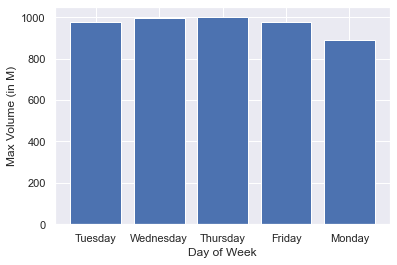

In [149]:
z = df[df.volume == 'Yes']
x = z.groupby(['day'])['volume_m'].transform(np.mean)
plt.bar(z.day, x)
plt.xlabel("Day of Week")
plt.ylabel("Max Volume (in M)")
plt.title ='Volume by Day'
plt.show()

### Find out the distribution of volume by time (matplotlib)
#### As per the graph below, the volume significantly increased around 2009

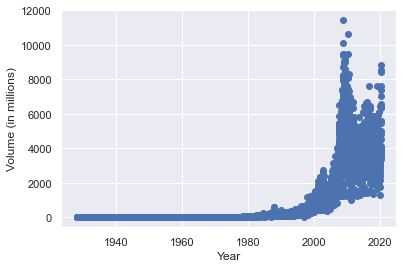

In [150]:
plt.scatter(df['Date'], df['volume_m'])
plt.ylabel('Volume (in millions)')
plt.xlabel('Year')
plt.title="Volume by Day"

### Find out out the Open-Close points land by date (matplotlib)
#### Per the graph below, most of the major losses and gains in the S& P index began happening recently

Text(0.5, 0, 'Year')

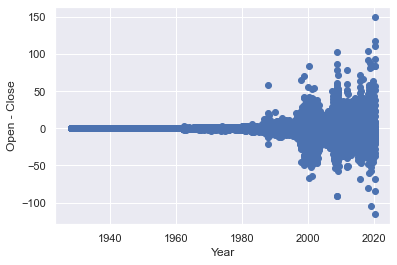

In [151]:
plt.scatter(df['Date'], df['open_close'])
plt.ylabel('Open - Close')
plt.xlabel('Year')

### Find out if there is a relationship between (seaborn)
#### As per the graph, there may be a correlation between the volume and the gain

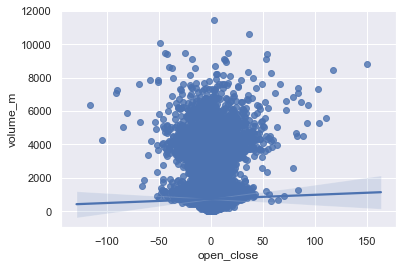

In [152]:
sns.regplot(x=df['open_close'], y=df['volume_m'])

### Find out how the Open-Close price spans by day (seaborn)
#### As per the graph below, most of the gains are on a Monday, but there are a few very high gains on Thursday

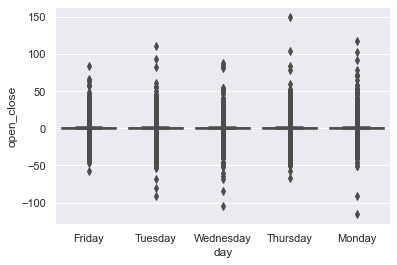

In [153]:
sns.boxplot(x=df['day'], y=df['open_close'])

### Create a line graph to see the Open Price (seaborn)
#### As per the graph, the increase in Open price occurred after around 2000, then it went down and spiked up again in 2010

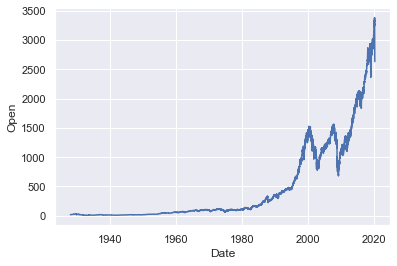

In [154]:
sns.lineplot(x=df.Date, y=df.Open)

### Create a density plot to see how the high and low compare to the close (plotly)
#### Per the graph below, the high and low generally stay in the range of close

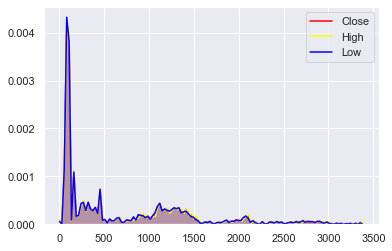

In [155]:
sns.kdeplot(df['Close'], shade=True, bw=.5, color="red")
sns.kdeplot(df['High'], shade=True, bw=.5, color="yellow")
sns.kdeplot(df['Low'], shade=True, bw=.5, color="blue")

### Create a violin graph to see how the volume looks by day (plotly)
#### Per the graph below, the highest volume generally runs of Fridays with the lowest on Mondays

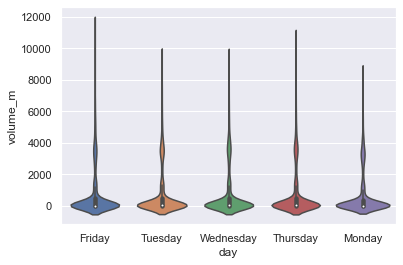

In [156]:
sns.violinplot( x=df["day"], y=df["volume_m"] )